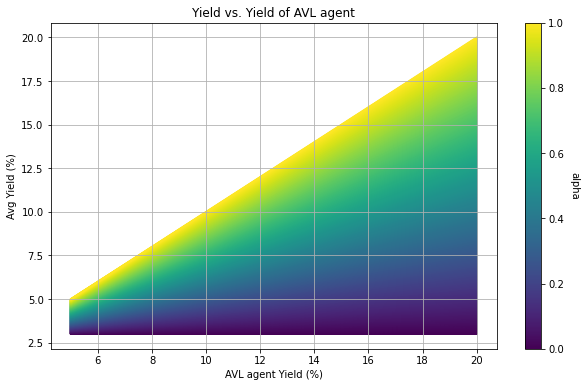

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm


y_E = 0.03  # 3%


y_A_values = np.linspace(0.05, 0.20, 500)  


alpha_values = np.linspace(0, 1, 500) 

Y_A, Alpha = np.meshgrid(y_A_values, alpha_values)


Y = y_E + (Y_A - y_E) * Alpha


Y_A_flat = Y_A.flatten()
Y_flat = Y.flatten()
Alpha_flat = Alpha.flatten()


norm = Normalize(vmin=0, vmax=1)
cmap = cm.viridis

plt.figure(figsize=(10, 6))
scatter = plt.scatter(Y_A_flat * 100, Y_flat * 100, c=Alpha_flat, cmap=cmap, s=1)


cbar = plt.colorbar(scatter)
cbar.set_label('alpha', rotation=270, labelpad=15)


plt.xlabel('AVL agent Yield (%)')
plt.ylabel('Avg Yield (%)')
plt.title('Yield vs. Yield of AVL agent')


plt.grid(True)


plt.show()


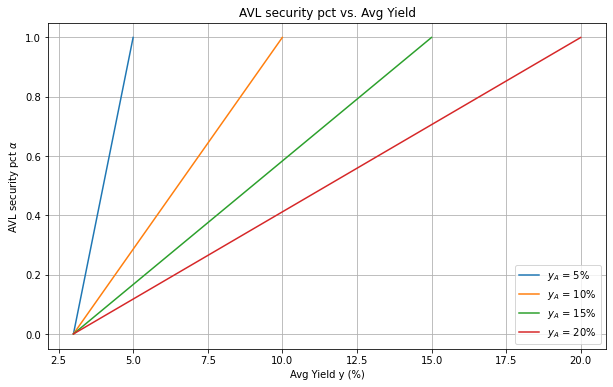

In [3]:
y_A_list = [0.05, 0.10, 0.15, 0.20]  # 5%, 10%, 15%, 20%

alpha_values = np.linspace(0, 1, 500)  # 从 0 到 1，共500个点

plt.figure(figsize=(10, 6))


for y_A in y_A_list:
    y_values = y_E + (y_A - y_E) * alpha_values
    
    plt.plot(y_values * 100, alpha_values, label=f'$y_A$ = {y_A * 100:.0f}%')

plt.xlabel('Avg Yield y (%)')
plt.ylabel('AVL security pct $\\alpha$')
plt.title('AVL security pct vs. Avg Yield')

plt.legend()

plt.grid(True)

plt.show()


Font 'default' does not have a glyph for '\uff08' [U+ff08], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uff09' [U+ff09], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uff08' [U+ff08], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uff09' [U+ff09], substituting with a dummy symbol.


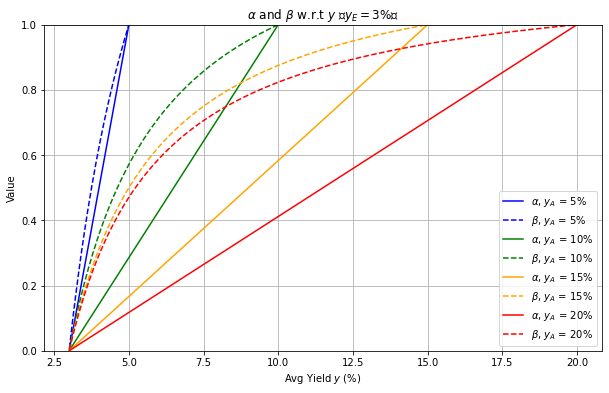

In [4]:
y_E = 0.03 
y_A_list = [0.05, 0.10, 0.15, 0.20]  


y_min = y_E + 0.0001
y_max = max(y_A_list) - 0.0001
y_values = np.linspace(y_min, y_max, 500)


plt.figure(figsize=(10, 6))


colors = ['blue', 'green', 'orange', 'red']

for idx, y_A in enumerate(y_A_list):
    alpha_values = (y_values - y_E) / (y_A - y_E)
    beta_values = (y_A * (y_values - y_E)) / ((y_A - y_E) * y_values)
    

    plt.plot(y_values * 100, alpha_values, color=colors[idx], linestyle='-', label=f'$\\alpha$, $y_A$ = {y_A * 100:.0f}%')
    plt.plot(y_values * 100, beta_values, color=colors[idx], linestyle='--', label=f'$\\beta$, $y_A$ = {y_A * 100:.0f}%')

plt.xlabel('Avg Yield $y$ (%)')
plt.ylabel('Value')
plt.title('$\\alpha$ and $\\beta$ w.r.t $y$ （$y_E = 3\%$）')

plt.legend()


plt.grid(True)

plt.ylim(0, 1)
plt.show()


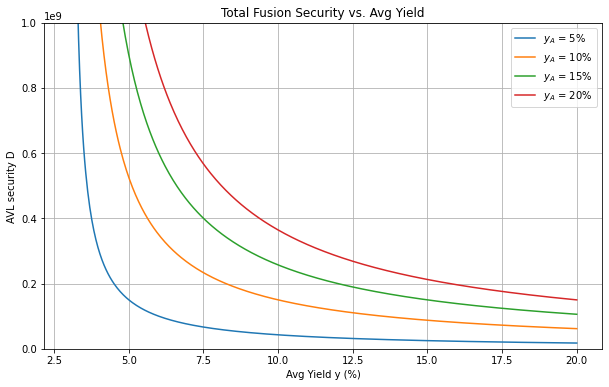

In [5]:
avl_price = 0.1
FDV = 10000000000 * avl_price
alpha_D = 0.15 * FDV  
y_E = 0.03  

y_A_list = [0.05, 0.10, 0.15, 0.20]

y_min = y_E + 0.0001
y_max = max(y_A_list)
y_values = np.linspace(y_min, y_max, 500)

plt.figure(figsize=(10, 6))

for y_A in y_A_list:
    numerator = alpha_D * (y_A - y_E)
    denominator = y_values - y_E
    D_values = numerator / denominator

    plt.plot(y_values * 100, D_values, label=f'$y_A$ = {y_A * 100:.0f}%')

plt.xlabel('Avg Yield y (%)')
plt.ylabel('AVL security D')
plt.title('Total Fusion Security vs. Avg Yield')

plt.legend()

plt.grid(True)

# y axis limits
plt.ylim(0, FDV)

plt.show()

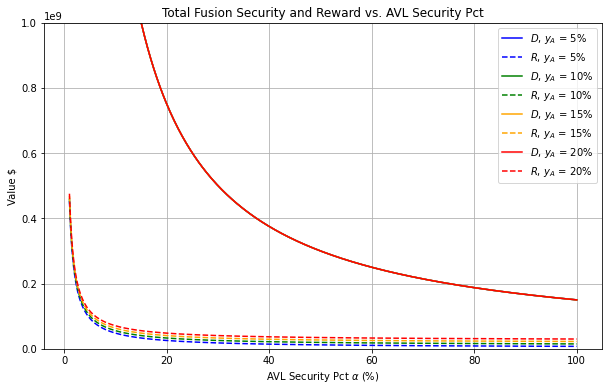

In [24]:
avl_price = 0.1
FDV = 10000000000 * avl_price
k = 0.15 * FDV  # αD = 15% * FDV
y_E = 0.03  # y_E = 3%
y_A_list = [0.05, 0.10, 0.15, 0.20]  # y_A = 5%, 10%, 15%, 20%

y_min = y_E + 0.0001
y_max = max(y_A_list) - 0.0001
alpha_values = np.linspace(0.01, 1.0, 500)


plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'orange', 'red']

for idx, y_A in enumerate(y_A_list):
    y_values = alpha_values * y_A + (1 - alpha_values) * y_E
    D_values = k / alpha_values
    R_values = D_values * y_values
    
    plt.plot(alpha_values * 100, D_values, color=colors[idx], linestyle='-', label=f'$D$, $y_A$ = {y_A * 100:.0f}%')
    plt.plot(alpha_values * 100, R_values, color=colors[idx], linestyle='--', label=f'$R$, $y_A$ = {y_A * 100:.0f}%')


plt.xlabel('AVL Security Pct $\\alpha$ (%)')
plt.ylabel('Value $')
plt.title('Total Fusion Security and Reward vs. AVL Security Pct')

plt.legend()


plt.grid(True)

plt.ylim(0, FDV)
plt.show()


In [22]:
y_values = alpha_values * y_A + (1 - alpha_values) * y_E
print(D_values)

[1.50000000e+10 1.25167224e+10 1.07388809e+10 9.40326633e+09
 8.36312849e+09 7.53018109e+09 6.84812443e+09 6.27936242e+09
 5.79783114e+09 5.38489209e+09 5.02686367e+09 4.71347607e+09
 4.43687018e+09 4.19092945e+09 3.97082228e+09 3.77268145e+09
 3.59337494e+09 3.43033914e+09 3.28145550e+09 3.14495798e+09
 3.01936265e+09 2.90341350e+09 2.79604034e+09 2.69632565e+09
 2.60347826e+09 2.51681237e+09 2.43573056e+09 2.35970996e+09
 2.28829104e+09 2.22106825e+09 2.15768233e+09 2.09781390e+09
 2.04117807e+09 1.98751992e+09 1.93661061e+09 1.88824420e+09
 1.84223480e+09 1.79841422e+09 1.75662990e+09 1.71674312e+09
 1.67862749e+09 1.64216762e+09 1.60725789e+09 1.57380151e+09
 1.54170958e+09 1.51090028e+09 1.48129824e+09 1.45283385e+09
 1.42544277e+09 1.39906542e+09 1.37364654e+09 1.34913482e+09
 1.32548256e+09 1.30264532e+09 1.28058169e+09 1.25925303e+09
 1.23862320e+09 1.21865842e+09 1.19932703e+09 1.18059937e+09
 1.16244759e+09 1.14484552e+09 1.12776857e+09 1.11119359e+09
 1.09509876e+09 1.079463

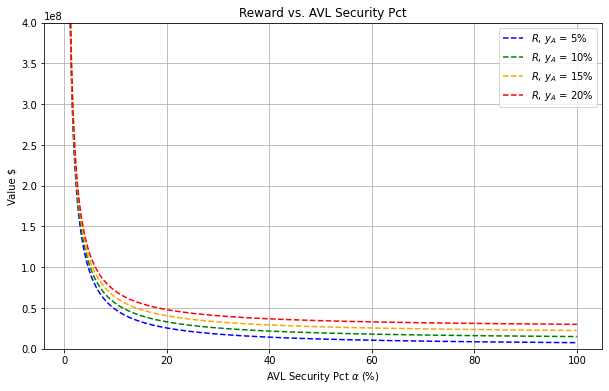

In [26]:
avl_price = 0.1
FDV = 10000000000 * avl_price
k = 0.15 * FDV  # αD = 15% * FDV
y_E = 0.03  # y_E = 3%
y_A_list = [0.05, 0.10, 0.15, 0.20]  # y_A = 5%, 10%, 15%, 20%

y_min = y_E + 0.0001
y_max = max(y_A_list) - 0.0001
alpha_values = np.linspace(0.01, 1.0, 500)


plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'orange', 'red']

for idx, y_A in enumerate(y_A_list):
    y_values = alpha_values * y_A + (1 - alpha_values) * y_E
    D_values = k / alpha_values
    R_values = D_values * y_values
    
    #plt.plot(alpha_values * 100, D_values, color=colors[idx], linestyle='-', label=f'$D$, $y_A$ = {y_A * 100:.0f}%')
    plt.plot(alpha_values * 100, R_values, color=colors[idx], linestyle='--', label=f'$R$, $y_A$ = {y_A * 100:.0f}%')


plt.xlabel('AVL Security Pct $\\alpha$ (%)')
plt.ylabel('Value $')
plt.title('Reward vs. AVL Security Pct')

plt.legend()


plt.grid(True)

plt.ylim(0, 0.4*FDV)
plt.show()